In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from tqdm import tqdm
import seaborn as sns
from scipy.sparse import dok_matrix
import itertools
from matplotlib.colors import LogNorm


In [61]:
import os.path as osp


# Function definitions

In [ ]:
def define_day(t):
    for k,v in day.items():
        if (t>=v[0]) and (t<=v[1]):
            return k

# Data import

* **High school** (Marseilles, Dec 2013) - 5 days + weighted directed network from _contact diares_ (w = 1 if t in [0 min,5 min], w = 2 if t in [5, 15], w  = 3 if t in [15 min, 1 h], w = 4 if t > 1h) + directed network of _reported friendships_ + _Facebook friendship network_ -----> named 'high_2013'
* **High school** (Marseilles, Dec 2011) - 4 days, 3 classes -----> named 'high_2011'
* **High school** (Marseilles, Nov 2012) - 7 days, 5 classes -----> named 'high_2012'
* **Primary school** (Lyon, Oct 2009) - 2 days 10 classes -----> named 'primary_school'

In [120]:
dataset_name = 'high_2012' # choose between 'primary_school', 'high_2011', 'high_2012', 'high_2013'

In [121]:
sep_data = '\t'
sep_metadata = '\t'
if dataset_name == 'primary_school':
    data_path, metadata_path = 'tij_pres_primaryschool.csv', 'metadata_primaryschool.txt'

elif dataset_name == 'high_2011':
    data_path, metadata_path = 'highschool_2011.csv', 'metadata_2011.txt'

elif dataset_name == 'high_2012':
    data_path, metadata_path = 'highschool_2012.csv', 'metadata_2012.txt'

elif dataset_name == 'high_2013':
    data_path, metadata_path = 'High-School_data_2013.csv', 'metadata_2013.txt'
    sep_data = ' '


In [122]:
path = osp.join('school_data','data', data_path)
data = pd.read_csv(path, sep=sep_data, header=None, names=['t','i','j','c_i','c_j'])
data.t = data.t - data.t.min()

path = osp.join('school_data','metadata', metadata_path)
metadata = pd.read_csv(path, sep=sep_metadata, header=None, names=['id','class','gender'])

<Axes: >

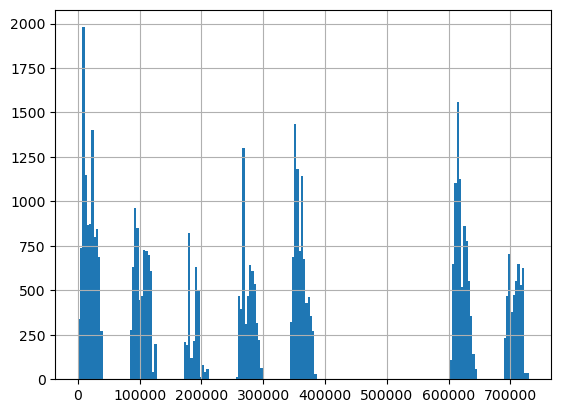

In [123]:
data.t.hist(bins=200)

<BarContainer object of 5 artists>

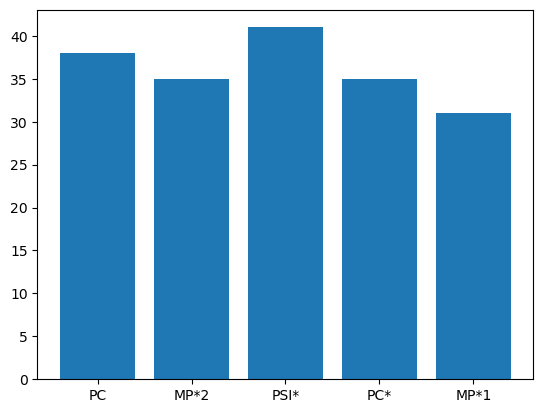

In [124]:
plt.bar(Counter(metadata['class']).keys(), Counter(metadata['class']).values())

In [125]:
day ={}
d = 1
prev_t = data.t.min()
day[d] = [prev_t]

for i,row in tqdm(data.iterrows()):
    if row.t - prev_t > 10000:
        day[d].append(prev_t) 
        d+=1
        day[d] = [row.t]
        
    prev_t= row.t
day[d].append(row.t)
    

45047it [00:00, 70672.40it/s]


In [126]:
data['day'] = data.t.apply(lambda x: define_day(x))

In [128]:
combs = itertools.combinations_with_replacement(metadata['class'].unique(), 2)
n_xy = {}
for comb in combs:
    n_xy[comb] = 0


In [129]:
for c_i, c_j in data[['c_i', 'c_j']].values:
    if (c_i,c_j) in n_xy.keys():
            n_xy[(c_i, c_j)] += 20
            continue
    n_xy[(c_j, c_i)] += 20

In [130]:
n_xy = {k:v/120 for k,v in n_xy.items()} #v / 60 / 2 (because it happens between two people) in order to have a contact matrix in minutes

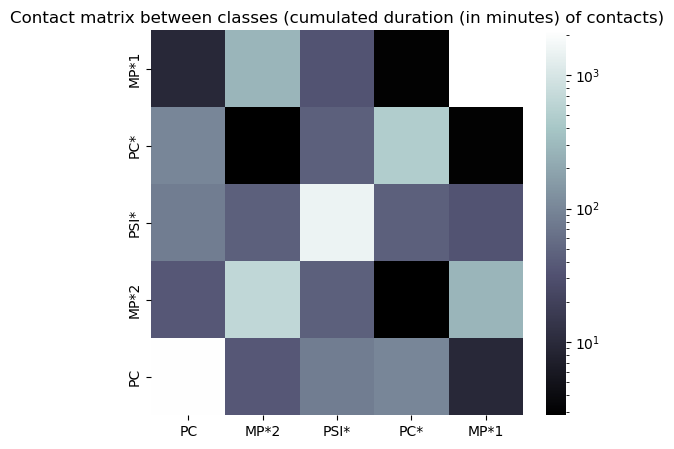

In [ ]:
classes = metadata['class'].unique()
times = pd.DataFrame(np.zeros((len(classes), len(classes))), index=classes, columns=classes)

for (i, j), value in n_xy.items():
    times.loc[i, j] = value  
    times.loc[j, i] = value  

plt.figure(figsize=(6, 5))
sns.heatmap(times, annot=False, cmap="bone", norm=LogNorm())

plt.title('Contact matrix between classes (cumulated duration (in minutes) of contacts)')
plt.show()

In [133]:
times

,PC,MP*2,PSI*,PC*,MP*1
PC,2103.166667,36.833333,81.333333,101.166667,9.500000
MP*2,36.833333,645.500000,43.833333,2.833333,274.833333
PSI*,81.333333,43.833333,1485.000000,43.666667,33.166667
PC*,101.166667,2.833333,43.666667,481.500000,3.000000
MP*1,9.500000,274.833333,33.166667,3.000000,2162.500000
